# 課題５
1810083　井上悠香
### １．
下記のサンプルコードを実行してMNISTデータを学習してください。
- simple_convnet.pyの実装も見てみましょう。

train loss:2.3004036337907534
=== epoch:1, train acc:0.333, test acc:0.314 ===
train loss:2.29753070768707
train loss:2.2934908513730816
train loss:2.286193506170246
train loss:2.2797479415393416
train loss:2.267680337361651
train loss:2.259163511327569
train loss:2.2385797346568395
train loss:2.2115658948829697
train loss:2.180043263824378
train loss:2.153706632188956
train loss:2.117097820853274
train loss:2.085083500126893
train loss:2.0086899961034472
train loss:1.953220030579053
train loss:1.8675188375933471
train loss:1.8420145246922417
train loss:1.7708813491894952
train loss:1.684483521657271
train loss:1.715490303606159
train loss:1.4891440198890618
train loss:1.4151166363713068
train loss:1.297073944868229
train loss:1.3256833934566177
train loss:1.1617210718770778
train loss:1.0363741015211678
train loss:1.0644650024329296
train loss:0.9766233480433981
train loss:0.9266367348522422
train loss:0.9213007605420478
train loss:0.9832928412488345
train loss:0.7956577015103499
trai

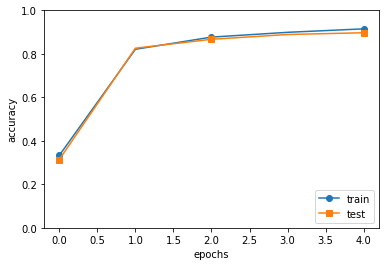

In [4]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 感想
CNNを用いることで、画像の形状を保ったままでも学習できた。今回のデータには関係ないが、これでRGBなどのチャンネルも加味した学習ができるようになったので、色のついた画像などで今までできなかった学習の仕方ができるようになると考えられる。今回の認識精度は91%であった。高い値ではあるが、前回より小さい値であった。グラフを見ると、testとtrainの認識精度が少し差が出始めている。おそらくこのデータセットに対する学習を続けても過学習が起きてしまうと考えられる。そこでもっと認識精度をあげるために前処理などにもっと工夫がいると思った。




## 7章まとめ（simple_convnet.pyの実装について）
7章では、畳み込みニューラルネットワーク（convolitional neural network:CNN）を学んだ。まず、CNNとは、画像認識や音声認識など至る所で使われているネットワークである。これまで見てきた全結合のニューラルネットワークでは,全結合層（Affineレイヤ）を用いていた。しかし、問題点として、
「データの形状が無視されてしまう」ことが挙げられる。<br>画像は通常、縦・横・チャンネルの三次元の形状である（チャンネル例：RGB）。そのため、全結合層に入力しようとすると一次元の形状にしなければならない。MINSTでは、28x28の画像を784x1にして入力していた。<br>
CNNでは、形状の情報を維持したまま入力できるので形状の情報を活かすことができる可能性がある。<br>
ここにCNNについてまとめていく。<br>
**構造**
- CNNは新しく「Convolutionレイヤ」と「Pooling レイヤ」が加わる。
- レイヤの繋がり順は「Convolution-ReLU-(Pooling)」
- 出力に近い層では、「Affine・ReLU」が使われている。
- 一番最後の出力層では、「Affine-Softmax」の組み合わせ 

**用語**
- 特徴マップ(feature map)：畳み込み層の入出力データ
- 入力特徴マップ(imput feature map)：畳み込み層の入力データ
- 出力特徴マップ（output feature map）：出力特徴マップ

**畳み込み演算**
- 画像処理でいう「フィルター処理」のこと
- 三次元データの畳み込み演算では、チャンネル方向ごとに演算して最後に加算して一つの出力を得る

**パディング**
- 畳み込み演算を行う時端っこにはピクセルが存在しなくなってしまう問題を、穴埋めすることで解決すること

**ストライド**
- フィルターに適用する位置の感覚

**プーリング層**
- 縦・横方向の空間を小さくする演算
- 学習するパラメータがない
  - プーリング層では、対象領域から最大値を取る / 平均値をとるだけの処理なので学習するべきパラメータはない
- チャンネル数は変化しない
  - プーリングの演算によって入力データと出力データのチャンネル数は変化しない。チャンネルごとに独立して研鑽される
- 微小な位置変化に対してロバスト（頑強）
  - 入力データの小さなズレに対してプーリング層は同じような結果を返す。
  - 入力データのズレをプーリングが吸収する
  
**ConvolutionレイヤとPooling レイヤ実装について**
- im2colという関数を使用する
- im2colは、フィルターにとって都合のいいように入力データを展開する関数
- フィルターを適用する場所の入力フィルターを二次元データにする
- im2colは、Image to columnの略記
- Convolutionレイヤの逆伝播にはcol2imを使って逆の操作をする
- Poolingレイヤ
  - 1. 入力データを展開
  - 2. 行ごとに最大値を求める
  - 3. 適切な出力サイズに整形する
  -  im2col出直したら一行ずつ最大値を取って最後二次元を直す処理のみ
  
CNNを一言でまとめると、形状データも扱えるようにしたニューラルネットワーク。<br>
そうを深くするごとに高度な情報が得られる。<br>
代表的なCNNとしては、

- LeNet：手書き数字認識を行うネットワークとして1998年に提案された。ReLUではなくSigmoid関数が使われた
- AlexNet：ディープラニングの注目を集めたネットワーク。活性化関数としてReLUが使用された。LRNという層を用いている。DropOutを使用する

がある。

In [2]:
import sys
sys.path.append('. .')
import numpy as np
from common.util import preprocess,create_co_matrix,most_similar,ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus,word_to_id,id_to_word = ptb.load_data('train')#corpusには単語IDのリストが格納される、ptb.load_Data()でデータをロードする
vocab_size = len(word_to_id)#サイズ計算
print('counting co-occurrence . . . ')
C = create_co_matrix(corpus,vocab_size,window_size)#共起行列を求める
print('calculating SVD . . .')
W = ppmi(C)#ppmi行列を計算、途中経過を表示する
try:
    #truncated SVD　速いSVD
    from sklearn.utils.exmath import randomized_svd
    U,S,V = randomize_svd(W,n_components = wordvec_size,n_iter = 5,random_state = None)
except ImportError:
    #SVD　さっき使った方
    U,S,V = np.linalg.svd(W)
    
word_vecs = U[:, :wordvec_size]

querys = ['you','year','car','toyota','we','happy','this','win']
for query in querys:
    most_similar(query,word_to_id,id_to_word,word_vecs,top = 5)#類似度を計算
    

counting co-occurrence . . . 
calculating SVD . . .

[query] you
 i: 0.7003179788589478
 we: 0.6367184519767761
 anybody: 0.5657642483711243
 do: 0.563567042350769
 'll: 0.5127798318862915

[query] year
 month: 0.6961644887924194
 quarter: 0.6884942054748535
 earlier: 0.6663320064544678
 last: 0.628136396408081
 next: 0.6175755858421326

[query] car
 luxury: 0.672883152961731
 auto: 0.6452109813690186
 vehicle: 0.6097723245620728
 cars: 0.6032834053039551
 corsica: 0.5698372721672058

[query] toyota
 motor: 0.7585657835006714
 nissan: 0.7148030996322632
 motors: 0.692615807056427
 lexus: 0.6583304405212402
 honda: 0.6350275278091431

[query] we
 i: 0.7858525514602661
 you: 0.6367184519767761
 're: 0.6329208612442017
 've: 0.6128445863723755
 'm: 0.6121340990066528

[query] happy
 convinced: 0.6081444025039673
 confident: 0.5931104421615601
 sorry: 0.5903697609901428
 glad: 0.5726175904273987
 pleased: 0.56303870677948

[query] this
 last: 0.5095800161361694
 year: 0.48587995767593384
 

#  感想
PTBデータをカウントベースの手法を用いて類似度を計算して与えたクエリと近い物を調べた。本とは別にのクエリとして、「we」「happy」「this」「win」も計算した。weの一番類似度が高いものは「i」で、その値も0.7858525514602661とかなり高い。主語の部分の言葉は感覚的にも一致するものが多く見られた。難しいなと感じたのは、動詞で、winに一番近いものはfindでその値は0.5765163898468018 でそこまで高くない。文脈から一番近いものを推測するのにカウントベースの手法だとうまくいかないこともありそうだと思った。今回思ったこととして、英語は単語単語の切れ目にスペースがあるので簡単に語彙に分けることができるが、日本語だとそうもいかないのでそこがまた難しそうだと思った。現時点で日本語は扱っていないけど、目標は日本語を人工知能を使って作ることなのでこの問題は心に留めておきたい。